In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os

np.set_printoptions(precision=4, suppress=True)

In [11]:
PATH = r"F:\Git\Bachelor2.0\Data\Experiments\VaryingLabels"

In [28]:
LP = np.genfromtxt(os.path.join(PATH, "test_lp_3.csv"), delimiter=",")
SRG = np.genfromtxt(os.path.join(PATH, "test_srg_2.csv"), delimiter=",")

# SRG = SRG[12:, :]
# print(SRG)

C:\Users\s174169\AppData\Local\Temp/ipykernel_8616/2014158736.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  lax.set_yticklabels([f'{int(x)}%' for x in lax.get_yticks()])
C:\Users\s174169\AppData\Local\Temp/ipykernel_8616/2014158736.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  sax.set_yticklabels([f'{int(x)}%' for x in sax.get_yticks()])
C:\Users\s174169\AppData\Local\Temp/ipykernel_8616/2014158736.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  cax.set_yticklabels([f'{int(x)}%' for x in cax.get_yticks()])


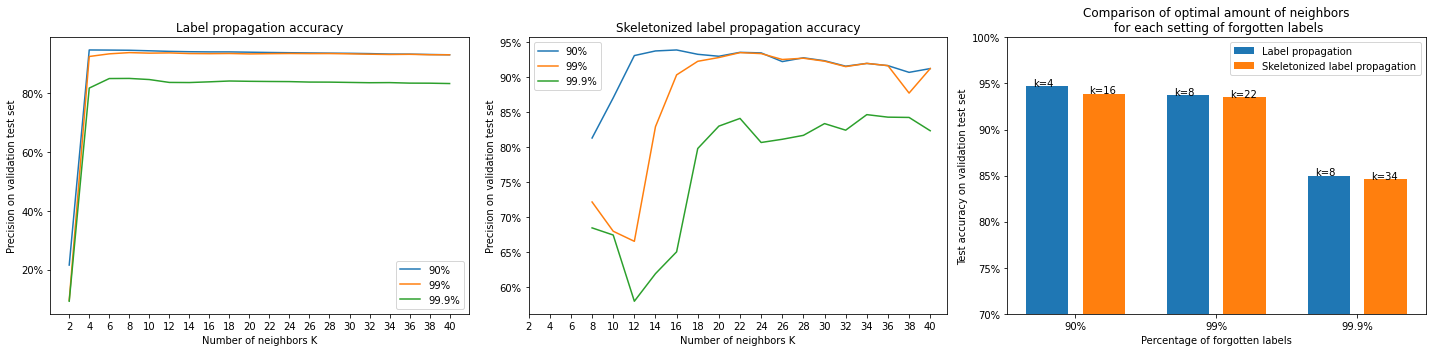

In [25]:
fig, (lax, sax, cax) = plt.subplots(1, 3, figsize=(20, 5))
lax.plot(LP[0::4, 0], LP[0::4, 3])
lax.plot(LP[0::4, 0], LP[1::4, 3])
lax.plot(LP[0::4, 0], LP[2::4, 3])

lax.set_xticks([x for x in range(2, 41, 2)])
lax.legend(["90%", "99%", "99.9%"])
lax.set_yticklabels([f'{int(x)}%' for x in lax.get_yticks()])


lax.set_xlabel("Number of neighbors K")
lax.set_ylabel("Precision on validation test set")
lax.set_title("Label propagation accuracy")

sax.plot(SRG[0::4, 0], SRG[0::4, 3])
sax.plot(SRG[1::4, 0], SRG[1::4, 3])
sax.plot(SRG[2::4, 0], SRG[2::4, 3])

sax.set_xticks([x for x in range(2, 41, 2)])
sax.legend(["90%", "99%", "99.9%"])
sax.set_yticklabels([f'{int(x)}%' for x in sax.get_yticks()])

sax.set_xlabel("Number of neighbors K")
sax.set_ylabel("Precision on validation test set")
sax.set_title("Skeletonized label propagation accuracy")

lp_best = []
for i in range(3):
    a = LP[i::4]
    b = np.argmax(a[:, 3])
    lp_best.append([a[b, 0], a[b, 3]])
lp_arr = np.array(lp_best)

srg_best = []
for i in range(3):
    a = SRG[i::4]
    b = np.argmax(a[:, 3])
    srg_best.append([a[b, 0], a[b, 3]])
srg_arr = np.array(srg_best)

cax.bar([0.8, 1.8, 2.8], lp_arr[:, 1], width=0.3)
cax.bar([1.2, 2.2, 3.2], srg_arr[:, 1], width=.3)
cax.set_ylim(70, 100)
cax.set_xticks([x for x in range(1, 4)])
cax.set_xticklabels(["90%", "99%", "99.9%"])

cax.set_yticklabels([f'{int(x)}%' for x in cax.get_yticks()])

cax.set_xlabel("Percentage of forgotten labels")
cax.set_ylabel("Test accuracy on validation test set")

cax.legend(["Label propagation", "Skeletonized label propagation"])

for i, val in enumerate(lp_arr):
    cax.text(i+0.7, val[1], f"k={int(val[0])}")

for i, val in enumerate(srg_arr):
    cax.text(i+1.1, val[1], f"k={int(val[0])}")

cax.set_title("Comparison of optimal amount of neighbors\n for each setting of forgotten labels")

plt.tight_layout()
plt.savefig("validationlabelresultvalidation")

In [22]:
print(srg_arr)
print(lp_arr)

[[ 4.   96.18]
 [22.   95.61]
 [34.   88.4 ]]
[[ 4.   96.26]
 [ 8.   95.73]
 [ 6.   86.64]]


In [15]:
for i in range(3):
    b = np.argmax(LP[i::4, 3])
    print(LP[i::4, 3])
    print(b*4)

[21.52 94.68 94.64 94.58 94.4  94.2  94.08 94.02 94.02 93.92 93.82 93.74
 93.66 93.6  93.54 93.44 93.28 93.26 93.14 93.04]
4
[ 9.54 92.46 93.36 93.78 93.6  93.68 93.46 93.42 93.48 93.34 93.42 93.48
 93.44 93.46 93.36 93.24 93.14 93.2  93.06 93.04]
12
[ 9.22 81.72 84.96 85.   84.62 83.64 83.6  83.84 84.12 84.02 83.96 83.92
 83.76 83.74 83.64 83.54 83.58 83.4  83.38 83.26]
12


In [16]:
import array_to_latex as a2l

print(lp_arr)
print(srg_arr)

[[ 4.   94.68]
 [ 8.   93.78]
 [ 8.   85.  ]]
[[ 4.   94.64]
 [22.   93.52]
 [ 6.   85.  ]]
